# Vector search engines with Python: from embeddings to similarity search

## What are Embeddings?

- An embedding is a relatively **low-dimensional** space into which you can translate high-dimensional vectors.
- Embeddings make it easier to do **machine learning on large inputs** like sparse vectors representing words. 
- An embedding **captures some of the semantics** of the input by placing semantically similar inputs close together in the embedding space. 
- An embedding can be learned and reused across models.

###  Example of an embedding

- Let's imagine that we want to **organizing movies by similarity** to be able to recommend a movie. 

![](1d.png)

- We need some kind of **descriptors** to be able to organize the movies and recommend them. We need to represent some of semantics of the movies.

- We can define two dimensions and classify those movies according to that those dimensions:
    - How popular they are
    - How appropiate are to watch with your children

![](2d.png)

#### Training signal, our assumption

- *e.g. if a user has watched a set of movies then to some extent those movies are similar to each other and should be nearby and we'll aggregate this of course over lots of data.*

<img src="input.png" width="600px"/>

- Each example (a row in this matrix) is a sparse vector of features (movies) that have been watched by the user Dense representation of this example as: (0, 1, 0, 1, 0, 0, 0, 1)

- With 1.000.000 movies I don't really want to list all the movies you haven't watched, it's so much more efficient to just write down the movies you have watched.

- Efficiently represent the sparse vector as just the movies the user watched. This might be represented as: 

<img src="array.png" width="200px"/>

#### We can generalize to n-Dimensional Embeddings

- We assume movies can be explained by the dimmensions we choose
- Each movie becomes a n-dimensional point where the value in dimension n represents how much the movie fits that aspect
- **Embeddings can be learned from data**
  - A hidden layer in a NN with a unit for each dimension will can represent every dimension you might want 
  - A supervised learning process will allow us to tailor the embedding for our task


#### Training the embedding

- We **train a model with whatever target** we know it makes sense for the data
- e.g. Recommend a set of movies
  - In this example the logit layer is big, instead of 10 different nodes like in the digit prediction, if I had a half million movies there's gonna be a half million of these.
  - We will get a distribution over those millions movies of what movies we think you'd like, we will then optimize the soft and max loss with the held out movies that we know you do like.
- Hidden units will **learn how to organize the data in a way to optimize our metric** we've decided to put as the final objective of the network.


<img src="layer.png"/>

#### Embeddings as a Tool
- Embeddings map items (e.g. movies, text,...) to low-dimensional real vectors in a way that similar items are close to each other
- Embeddings can also be applied to dense data (e.g. audio) to create a meaningful similarity metric
- Jointly embedding diverse data types (e.g. text, images, audio, ...) define a similarity between them

<h3 style="color: blue"> Embeddings give us a way to use an efficient, dense representation in which similar entities have a similar encoding.</h3>

#### We can embed other information like words

1. Transform the word into a meaningful set of data
2. Train a model to generate the embeddings
3. Get the embeddings for each word

#### Embedding methods

##### Word embeddings
- Word embedding techniques learn a global word embedding. 
  1. They first build a global vocabulary using unique words in the documents by ignoring the meaning of words in different context.
  1. Then, similar representations are learnt for the words appeared more frequently close each other in the documents. 
- In 2013 Mikolov et al. created **word2vec** an embedding technique
- In 2014 Manning et al created **GloVe**
- In 2015 FAIR created **fastText**
- [Learn more](https://jalammar.github.io/illustrated-word2vec/)
- [Learn more](https://amitness.com/2020/06/fasttext-embeddings/)

  
#### The problem is that in such word representations the words' contextual meaning (the meaning derived from the words' surroundings), is ignored. 
- For example, only one representation is learnt for "left" in sentence "I left my phone on the left side of the table." However, "left" has two different meanings in the sentence, and needs to have two different representations in the embedding space.


##### Contextual embedding
- Multiple embeddings for each word depending.
- The	embedding	of	a	word	type	should	depend	on	its	context.
- Contextual embedding methods are used to learn sequence-level semantics by considering the sequence of all words in the documents.
- In 2018 ELMo by Peters et al.
- In 2018 BERT by Devlin et al.
- In 2019 GPT-2 by Radford et al.
- [Learn more](https://jalammar.github.io/illustrated-bert/)
- [Learn more](https://jalammar.github.io/illustrated-transformer/)

## What is Vector Similarity Search?

- Embeddings are vectors with a **semantic similarity**

- We can calculate the **distance between these vectors** in the vectors space

- There are many ways to compute distance metrics such as Euclidean, Manhattan, Cosine, and Chebyshev.

![](metrics.jpg)

- Now we know we can use vector embeddings to represent our objects, and the **distances between vectors represent the similarity** between the objects themselves.

- Given a set of vectors and a query vector, we can find the most similar items in our set for the query. 

#### K Nearest Neighbors

- K nearest neighbors or k-NN is a very popular algorithm to find nearest vectors in a space for a given query vector. The k here is a hyperparameter set by us which denotes how many nearest neighbors we want to retrieve.

- We can perform k-NN on the vectors we have for our data and retrieve the nearest neighbors for our query vector depending on the distance between the vectors.

![](knn.jpg)

### Example

In [10]:
!pip install gensim scikit-learn seaborn

     |████████████████████████████████| 24.0 MB 22 kB/s  eta 0:00:01
     |████████████████████████████████| 292 kB 36.3 MB/s eta 0:00:01
     |████████████████████████████████| 58 kB 41.0 MB/s  eta 0:00:01
     |████████████████████████████████| 7.3 MB 12.8 MB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 24.7 MB/s eta 0:00:01
     |████████████████████████████████| 61 kB 1.9 MB/s  eta 0:00:011
     |████████████████████████████████| 880 kB 46.5 MB/s eta 0:00:01


In [11]:
import gensim
import gensim.downloader as api
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

##### Download a table of pre-trained embeddings

In [16]:
# Download embeddings (66MB, glove, trained on wikipedia)
model = api.load("glove-wiki-gigaword-50")

#### How many words does this table have?

In [23]:
model.vectors.shape

(400000, 50)

#### Lets visualize a word embedding semantic

In [13]:
model['king']

array([ 0.50451 ,  0.68607 , -0.59517 , -0.022801,  0.60046 , -0.13498 ,
       -0.08813 ,  0.47377 , -0.61798 , -0.31012 , -0.076666,  1.493   ,
       -0.034189, -0.98173 ,  0.68229 ,  0.81722 , -0.51874 , -0.31503 ,
       -0.55809 ,  0.66421 ,  0.1961  , -0.13495 , -0.11476 , -0.30344 ,
        0.41177 , -2.223   , -1.0756  , -1.0783  , -0.34354 ,  0.33505 ,
        1.9927  , -0.04234 , -0.64319 ,  0.71125 ,  0.49159 ,  0.16754 ,
        0.34344 , -0.25663 , -0.8523  ,  0.1661  ,  0.40102 ,  1.1685  ,
       -1.0137  , -0.21585 , -0.15155 ,  0.78321 , -0.91241 , -1.6106  ,
       -0.64426 , -0.51042 ], dtype=float32)

In [15]:
def plot_embeddings(vectors, labels=None):
    n_vectors = len(vectors)
    fig = plt.figure(figsize=(12, n_vectors))
    # ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
    # ax = fig.add_axes([1, 1, 1, 1])
    ax = plt.gca()
    
    sns.heatmap(vectors, cmap='RdBu', vmax=2, vmin=-2, ax=ax)
    
    if labels:
        ax.set_yticklabels(labels,rotation=0)
        ax.tick_params(axis='both', which='major', labelsize=30)
        
    plt.tick_params(axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False) # labels along the bottom edge are off
    
    # From https://github.com/mwaskom/seaborn/issues/1773
    # fix for mpl bug that cuts off top/bottom of seaborn viz
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show() # ta-da!

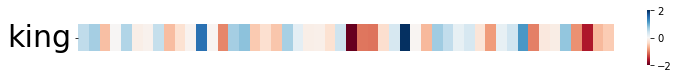

In [17]:
plot_embeddings([model['king']], ['king'])

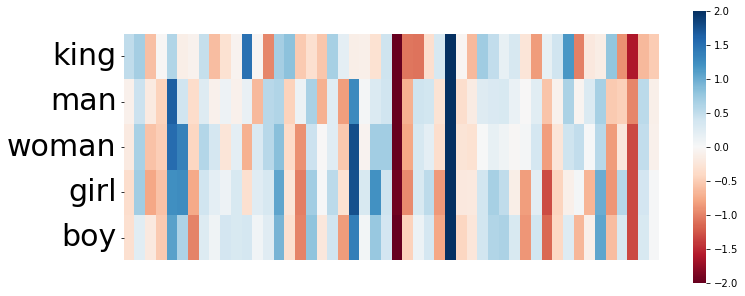

In [18]:
plot_embeddings([model['king'], model['man'], model['woman'], model['girl'], model['boy']],
              ['king', 'man', 'woman', 'girl', 'boy'])

#### Analogies

**king - man + woman = ?**

In [24]:
model.most_similar(positive=["king", "woman"], negative=["man"])

[('queen', 0.8523604869842529),
 ('throne', 0.7664334177970886),
 ('prince', 0.759214460849762),
 ('daughter', 0.7473883628845215),
 ('elizabeth', 0.7460219860076904),
 ('princess', 0.7424570322036743),
 ('kingdom', 0.7337412238121033),
 ('monarch', 0.7214491367340088),
 ('eldest', 0.7184861898422241),
 ('widow', 0.7099431157112122)]

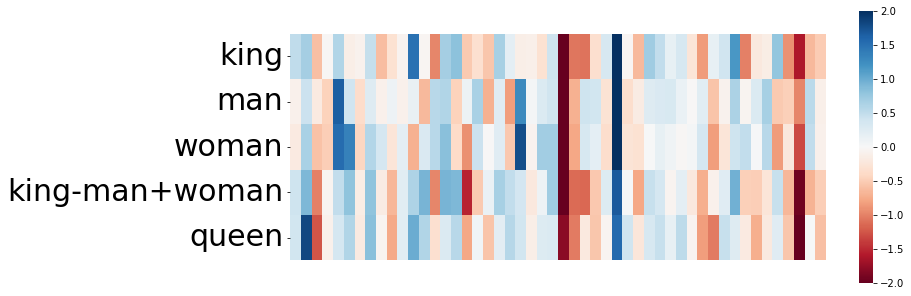

In [20]:
plot_embeddings([model['king'], 
                model['man'], 
                model['woman'],
                model['king'] - model['man'] + model['woman'],
                model['queen']],
                ['king', 'man', 'woman', 'king-man+woman', 'queen'])

To verify, let's calculate cosine distance between the result of the analogy, and queen.


In [22]:
result = model['king'] - model['man'] + model['woman']

# Similarity between result and 'queen'
cosine_similarity(result.reshape(1, -1), model['queen'].reshape(1, -1))
# Similarity between result and 'king'
cosine_similarity(result.reshape(1, -1), model['king'].reshape(1, -1))

array([[0.8859834]], dtype=float32)

## What is a Vector Database?

- When we create a **large amount of vectors in our daily operations**, we need a place to store all the candidate vectors that we might want search on.

- Existing database management systems (DBMS), relational or not,  can be good place to store vectors **BUT** databases are not meant to store thing but to **manage** data. That means they should be able to read, update, write and search data.

- **Classic DBMS do not have efficient pathways** to work with large numerical vectors and to compute operations on them

- Vector DBMS are meant to fill the gap with efficient storage and management solutions



#### What can a VDBMS do for you

- Insert, Update, Read and Delete vectors efficiently
- Perform search on the data fast and efficiently
- Create and update data index

![](space.png)

#### Approximate Neighbor Search

To reduce the computation complexity added by an exhaustive search like kNN we make use of approximate neighbor search. Instead of checking distances between each vector in the database, we retrieve a “good guess” of the nearest neighbor. 

![](workflow.)

## So what do I do with my vector embedding?

1. Create your embeddings or use exsiting ones
1. Transform your data into an embedding
1. Insert the data into the vector DBMS
1. Perform your queries to the data

![](workflow.png)
![](example.png)

## Efficient Filtering of Vectors

#### Vector Index

- Vector indexes are a core component of a vector database. 
- Vector indexes allow us to store vectors and apply filters to them efficiently, and index builders improve on the process.
  - **Scalability**: Vectors can exceed the limits of a single machine. This means having functionalities like sharding to split the load.
  - **Latency**: When dealing with the scale, query latency, write and update latency have to be great even when performing operations online.
  - **Operations**: Ensuring availability, monitoring, and overall infrastructure orchestration.
  - **Flexibility**: Support and possibly abstract the ability to choose different indexes and algorithms for nearest neighbor search and support different computing infrastructures (CPU, GPU, etc).




## Use cases: text, image, video, audio, graph and relational data

![](ex1.png)

![](vector_embeddings.jpg)

##### Biobliography
- https://developers.google.com/machine-learning/crash-course/embeddings/video-lecture
- https://e2eml.school/transformers.html
- https://jalammar.github.io/illustrated-word2vec/